# GEDI Subsetting Use Case

This notebook demonstrates using modified ORNL DAAC code to run a subset of GEDI data for a given polygon (country).

1. Query CMR for granules
2. Download granules
3. Subset each granule (parallel)
4. Combine the subsets

In [7]:
import os
# These lists will never match, since some granules have 0 returns
folder_path = '/projects/my-public-bucket/gedi-l4a/gabon'
file_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('h5')]
print(len(file_list))

file_list_fgb = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('fgb')]
print(len(file_list_fgb))

1009
467


In [5]:
# Look for where in the h5 list the last fgb file occurs to see how many are done
file_list.index(file_list_fgb[-1].replace('fgb', 'h5'))

992

In [6]:
file_list_fgb[-1]

'/projects/my-public-bucket/gedi-l4a/gabon/GEDI04_A_2021194171304_O14639_01_T11287_02_002_01_V002.fgb'

In [13]:
file_list[9:12]

['/projects/my-public-bucket/gedi-l4a/gabon/GEDI04_A_2019114135421_O02061_04_T00905_02_002_01_V002.h5',
 '/projects/my-public-bucket/gedi-l4a/gabon/GEDI04_A_2019115021551_O02069_01_T03606_02_002_01_V002.h5',
 '/projects/my-public-bucket/gedi-l4a/gabon/GEDI04_A_2019115021551_O02069_02_T03606_02_002_01_V002.h5']

# Reviewing Results

In [2]:
import geopandas as gpd
#import dask_geopandas
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
# needs pyogrio but can't install it
#ddf = dask_geopandas.read_file("/projects/tmp/gabon_q1.gpkg", npartitions=4)

In [6]:
# TOO big to open in memory
#gedi_gabon = gpd.read_file("/projects/shared-buckets/alexdevseed/gedi-l4a/gabon.gpkg")

#!ogr2ogr -sql 'SELECT * FROM gabon WHERE l4_quality_flag = 1 AND sensitivity > 0.95;' -f GPKG /projects/tmp/gabon_q1.gpkg /projects/shared-buckets/alexdevseed/gedi-l4a/gabon.gpkg

	- 'VirtualXPath'	[XML Path Language - XPath]
	- 'VirtualXPath'	[XML Path Language - XPath]


In [49]:
# Review the Available Data
!ogrinfo -so /projects/tmp/gabon_q1.gpkg SELECT

	- 'VirtualXPath'	[XML Path Language - XPath]
INFO: Open of `/projects/tmp/gabon_q1.gpkg'
      using driver `GPKG' successful.

Layer name: SELECT
Geometry: Point
Feature Count: 2878703
Extent: (8.700494, -3.931142) - (14.501264, 2.320480)
Layer SRS WKT:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["unknown"],
        AREA["World"],
        BBOX[-90,-180,90,180]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
FID Column = fid
Geometry Column = geom
BEAM: String (0.0)
agbd: Real (0.0)
agbd_se: Real (0.0)
l4_quality_flag

In [3]:
# Still very big, only read the first million rows
gedi_gabon = gpd.read_file("/projects/tmp/gabon_q1.gpkg", rows=1000000)

In [22]:
gabon = gpd.read_file("/projects/shared-buckets/dschuck/iso3/GAB-ADM0.geojson")

In [6]:
gedi_gabon.head()

,BEAM,agbd,agbd_se,l4_quality_flag,sensitivity,filename,geometry
0,BEAM0001,87.664375,17.128048,1,0.953119,GEDI04_A_2019108045816_O01962_02_T01066_02_002...,POINT (13.20713 0.41303)
1,BEAM0010,80.751396,17.128508,1,0.951370,GEDI04_A_2019108045816_O01962_02_T01066_02_002...,POINT (13.21360 0.41312)
2,BEAM0010,60.572933,17.126802,1,0.965496,GEDI04_A_2019108045816_O01962_02_T01066_02_002...,POINT (13.21449 0.41438)
3,BEAM0010,31.051189,17.136190,1,0.966831,GEDI04_A_2019108045816_O01962_02_T01066_02_002...,POINT (13.21419 0.41396)
4,BEAM0101,224.527771,17.122900,1,0.951991,GEDI04_A_2019108045816_O01962_02_T01066_02_002...,POINT (13.25694 0.45493)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f730d5cbad0>],
      dtype=object)

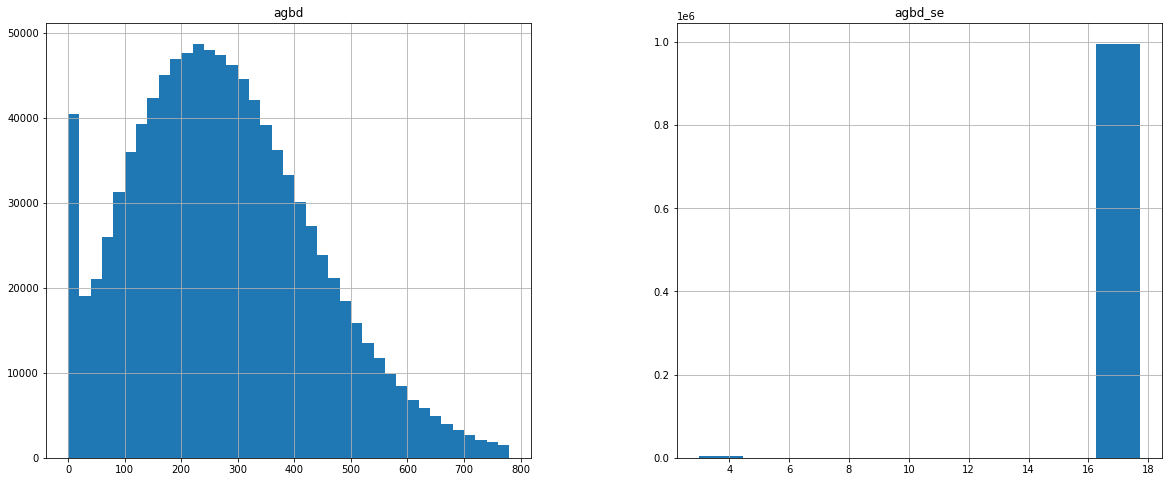

In [47]:
fig, (hx1,hx2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
gedi_gabon.hist(column='agbd', bins=range(0,800,20), ax= hx1)
gedi_gabon.hist(column='agbd_se', ax = hx2)

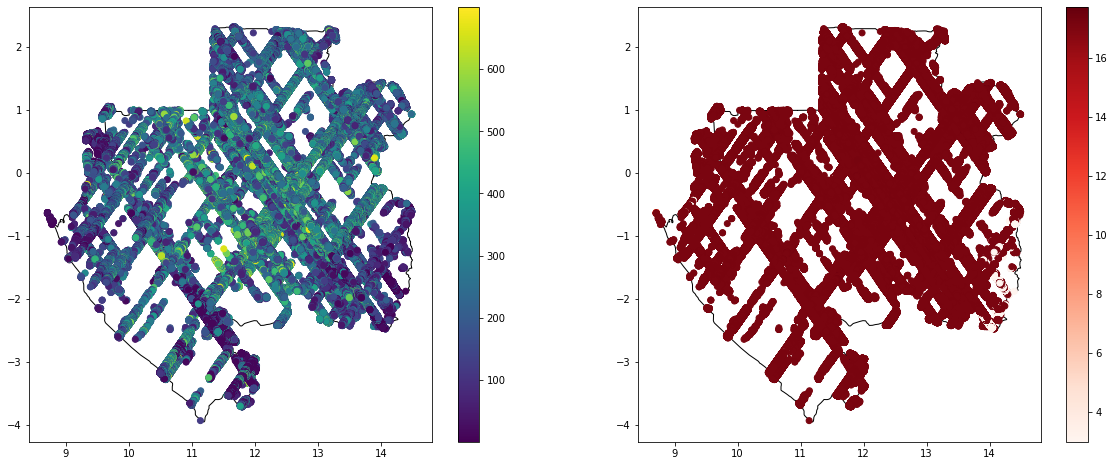

In [44]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

base1 = gabon.plot(
#    figsize=(10, 8),
    color='white', 
    edgecolor='black',
    ax = ax1
)

base2 = gabon.plot(
#    figsize=(10, 8),
    color='white', 
    edgecolor='black',
    ax = ax2
)

agbd_colors = plt.cm.get_cmap('viridis')
gedi_gabon[gedi_gabon['agbd'] <= 700].plot(
    ax = base1,
    column='agbd', 
    cmap=agbd_colors, 
    legend=True
)


agbd_se_colors = plt.cm.get_cmap('Reds')
gedi_gabon[gedi_gabon['agbd'] <= 700].plot(
    ax = ax2,
    column='agbd_se', 
    cmap=agbd_se_colors, 
    legend=True
)

# TODO add second plot of SE